In [1]:
import pandas as pd
from region import *
from timeseries import *
from scan import *
import seaborn as sbn
import plotly_express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ActonMay4MALD20_2.csv")
df = convert_dates(df)
df


,detector_id,lon,lat,measurement_start_utc,measurement_end_utc,baseline,count
0,N24/012a1,-0.288008,51.481486,2020-06-03 00:00:00,2020-06-03 01:00:00,50.10,90.0
1,N24/012a1,-0.288008,51.481486,2020-06-03 01:00:00,2020-06-03 02:00:00,34.85,46.0
2,N24/012a1,-0.288008,51.481486,2020-06-03 02:00:00,2020-06-03 03:00:00,29.25,34.0
3,N24/012a1,-0.288008,51.481486,2020-06-03 03:00:00,2020-06-03 04:00:00,36.75,49.0
4,N24/012a1,-0.288008,51.481486,2020-06-03 04:00:00,2020-06-03 05:00:00,87.70,128.0
...,...,...,...,...,...,...,...
8635,N27/299a1,-0.308928,51.512572,2020-06-04 19:00:00,2020-06-04 20:00:00,400.75,450.0
8636,N27/299a1,-0.308928,51.512572,2020-06-04 20:00:00,2020-06-04 21:00:00,312.65,329.0
8637,N27/299a1,-0.308928,51.512572,2020-06-04 21:00:00,2020-06-04 22:00:00,271.95,263.0
8638,N27/299a1,-0.308928,51.512572,2020-06-04 22:00:00,2020-06-04 23:00:00,207.15,183.0


In [3]:
def plot_region_grid(forecast_data: pd.DataFrame, time_slice: datetime, grid_partition: int) -> None:
    global_region = infer_global_region(forecast_data)
    x_ticks, y_ticks, t_ticks = make_grid(global_region, grid_partition)
    forecast_data = forecast_data[forecast_data['measurement_end_utc'] == time_slice]
    
    sbn.scatterplot(data=forecast_data, x='lon', y='lat', size='baseline', legend=False)
  
    
    for _, x in enumerate(x_ticks[1:-1]):
        plt.axvline(x=x, alpha=0.4, c='k')
    for _, y in enumerate(y_ticks[1:-1]):
        plt.axhline(y=y, alpha=0.4, c='k')
    plt.xlim([global_region.x_min, global_region.x_max])
    plt.ylim([global_region.y_min, global_region.y_max])
    return None

In [4]:
test_date = df['measurement_end_utc'][2]
test_date

Timestamp('2020-06-03 03:00:00')

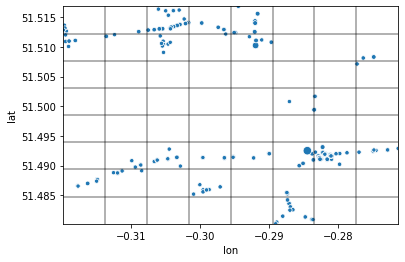

In [5]:
plot_region_grid(df, test_date, 8)